# Model `MaxSAT`

Make sure you've compiled MaxSAT in your WSL environment.

In [33]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
# data.generate(seed=1997)

# data.add_noise(noise=[0.4, 0.1], seed=2000)
# data.show_matrix()

In [35]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [36]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720596482
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720596482


[I] k            : 50
[I] mode         : fast_undercover
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
=== stdout ===
Search for a 50-undercover with the FastUndercover heuristic.
k = 50
okOnZero: 139246
okOnOne: 5157
errOnZero: 0
errOnOne: 5597
acc: 0.962687

=== stderr ===

[W] Timer not started.
[I] model saved as: 24-07-10_15-37-39_MaxSAT.pickle


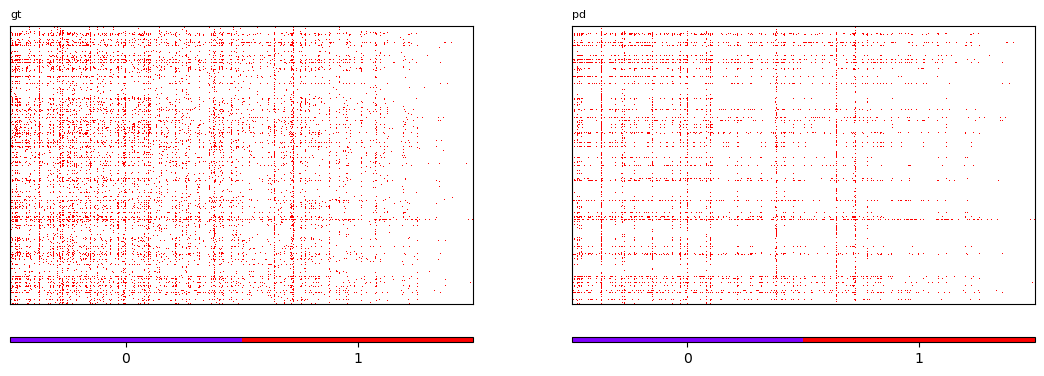

train                              
                             0                              
                time    Recall Precision  Accuracy        F1
0  10/07/24 03:37:39  0.479542       1.0  0.962687  0.648231

<Figure size 640x480 with 0 Axes>

In [42]:
from models import MaxSAT

k = 50
W = 'full'

model = MaxSAT(k=k)
model.fit(X_train=X_train, task='reconstruction', verbose=True)

In [43]:
# import subprocess
# from utils import to_dense

# X = to_dense(X_train)
# X.tofile("D:/Dropbox/PyBMF/models/bmf_maxsat_avellaneda/input.csv", sep = ',')

# cp = subprocess.run([
#     "wsl", 
#     "~", 
#     "-e", 
#     "/mnt/d/Dropbox/PyBMF/models/bmf_maxsat_avellaneda/inferbmf", 
#     "-k", 
#     "50", 
#     "fromFile",
#     "-o", 
#     "/mnt/d/Dropbox/PyBMF/models/bmf_maxsat_avellaneda/result",
#     "/mnt/d/Dropbox/PyBMF/models/bmf_maxsat_avellaneda/input.csv"
#     ], capture_output=True, shell=True)

# print("=== stdout ===")
# print(cp.stdout.decode())

# print("=== stderr ===")
# print(cp.stderr.decode())

# from utils import show_matrix, matmul
# import numpy as np

# U = np.genfromtxt('../models/bmf_maxsat_avellaneda/result.A.csv', delimiter=',')
# V = np.genfromtxt('../models/bmf_maxsat_avellaneda/result.B.csv', delimiter=',').T

# X_pd = matmul(U, V.T, boolean=True, sparse=True)

# show_matrix([(X_pd, [0, 0], 'X_pd')])